- CEN denotes the number of continuous edge pixels in edge image
- TEN represents the number of all pixels in edge image

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 639.5, 479.5, -0.5)

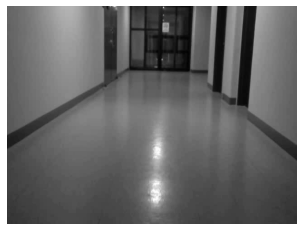

In [36]:
cap = cv2.VideoCapture("./test1.mp4")
_, frame = cap.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.axis('off')

(-0.5, 639.5, 479.5, -0.5)

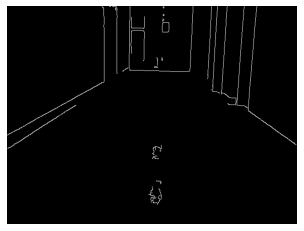

In [37]:
edge = cv2.Canny(gray, 100, 200)
plt.imshow(edge, cmap='gray')
plt.axis('off')

In [38]:
# 전체 edge pixel 수 
edge.shape[0] * edge.shape[1] 

307200

In [39]:
# edge 존재하는 count
edge_points = np.sum(edge == 255)
print(edge_points)

3298


In [41]:
c_count = 0
total_length = 0

contours, _ = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


for c in contours :
    c_count += len(c)
    length = cv2.arcLength(c, True)
    total_length += length
    
mean_val = c_count / len(contours)
average_length = total_length / len(contours)

print(mean_val, average_length)

58.285714285714285 220.23083262358392


(-0.5, 639.5, 479.5, -0.5)

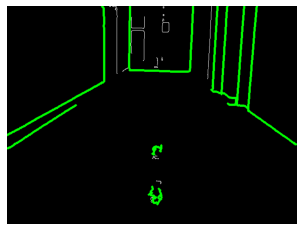

In [42]:
color_image = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

contour_list = list()
length_list = list()
filter_list = list()

for c in contours :
    if len(c) > mean_val :
        contour_list.append(c)
        
    if cv2.arcLength(c, True) > average_length : 
        length_list.append(c)
        
    if len(c) > mean_val and cv2.arcLength(c, True) > average_length : 
        filter_list.append(c)
        
len(contour_list)

cv2.drawContours(color_image, contour_list, -1, (0, 255, 0), 3)  # Draw contours in green

plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [ ]:
color_image = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

cv2.drawContours(color_image, filter_list, -1, (0, 255, 0), 3)  # Draw contours in green

plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [ ]:
color_image = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

cv2.drawContours(color_image, length_list, -1, (0, 255, 0), 3)  # Draw contours in green
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [ ]:
binary_contour_image = np.zeros_like(color_image)
cv2.drawContours(binary_contour_image, filter_list, -1, (255, 255, 255), 1)
binary_contour_image = cv2.cvtColor(binary_contour_image, cv2.COLOR_BGR2GRAY)
plt.imshow(binary_contour_image, cmap='gray')
plt.axis('off')


In [ ]:
def calculate_angle(x1, y1, x2, y2):
    return np.arctan2(y2 - y1, x2 - x1) * 180.0 / np.pi


def filter_lines(lines, angle_threshold, dist_threshold):
    filtered_lines = []
    used = [False] * len(lines)

    for i in range(len(lines)):
        if not used[i]:
            max_length = get_line_length(lines[i])
            selected_line = lines[i]
            angle_i = get_angle(lines[i])
            midpoint_i = get_midpoint(lines[i])
            used[i] = True

            for j in range(i + 1, len(lines)):
                if not used[j]:
                    angle_j = get_angle(lines[j])
                    if abs(angle_i - angle_j) <= angle_threshold:
                        midpoint_j = get_midpoint(lines[j])
                        if distance_between_points(midpoint_i, midpoint_j) < dist_threshold:
                            length = get_line_length(lines[j])
                            if length > max_length:
                                selected_line = lines[j]
                                max_length = length
                            used[j] = True
            filtered_lines.append(selected_line)

    return filtered_lines

angle_threshold = 15 # 중복제거 선 각도 임계
dist_threshold = 20   # 중복제거 선 거리 임계
threshold_distance = 30 # 중복제거 점간 거리 임계
hough_threshold = 100
min_line_length = 120
max_line_gap = 100


lines = cv2.HoughLinesP(binary_contour_image, 1, np.pi/180, hough_threshold, minLineLength=min_line_length,
                           maxLineGap=max_line_gap)

print(len(lines))

new_points = []
filtered_lines = None
if lines is not None :
    filtered_lines = filter_lines(lines, angle_threshold, dist_threshold)

if filtered_lines is not None :
    for line in filtered_lines:
        x1, y1, x2, y2 = line[0]
        new_points.append([x1, y1])
        new_points.append([x2, y2])

    lines = filtered_lines.copy()  

print("filtered lines :",len(lines))
    
window = frame.copy()

for line in lines : 
    x1, y1, x2, y2 = line[0]
    angle = calculate_angle(x1, y1, x2, y2)       
    if (-100 <= angle <= -80) or (80 <= angle <= 100):  # vertical line 
        cv2.line(window, (x1, y1), (x2, y2), (0, 255, 0), 3)
    # horizontal
    else :
        cv2.line(window, (x1, y1), (x2, y2), (255,0, 0), 3)   
    
    
plt.imshow(window)
plt.axis('off')

## 함수화 

(-0.5, 639.5, 479.5, -0.5)

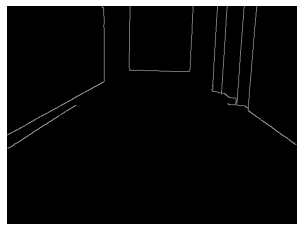

In [70]:
def simplify_edges(edge) : 
    contours, _ = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    c_count = 0
    total_length = 0
    for c in contours :
        c_count += len(c)
        length = cv2.arcLength(c, True)
        total_length += length

    mean_val = c_count / len(contours)
    average_length = total_length / len(contours)
    
    color_image = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

    contour_list = list()

    for c in contours :
        if len(c) > mean_val and cv2.arcLength(c, True) > average_length : 
            contour_list.append(c)
            
    binary_contour_image = np.zeros_like(color_image)
    cv2.drawContours(binary_contour_image, contour_list, -1, (255, 255, 255), 1)
    binary_contour_image = cv2.cvtColor(binary_contour_image, cv2.COLOR_BGR2GRAY)

    return binary_contour_image


simplifed = simplify_edges(edge)
plt.imshow(simplifed,cmap='gray')
plt.axis('off')

In [82]:
def find_edges_and_segments(binary_image):
    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    edge_segments = contours  # All contours are considered as edge segments
    
    # Filter or process contours to find edge lines
    edge_lines = []
    for contour in contours:
        # You can filter based on the length of the contour or use approximation
        if len(contour) > 25 :  # Define some_length_threshold as per your requirement
            # Approximate the contour to simplify it
            epsilon = 0.01 * cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, epsilon, True)
            edge_lines.append(approx)
    
    return edge_segments, edge_lines

edge_seg, edge_lines = find_edges_and_segments(edge)
print(len(edge_seg), len(edge_lines))

33 12


In [83]:
# for contour in contours : 
#     print(len(contour))

In [84]:
# R = TEN / CEN 
len(edge_lines) / len(edge_seg)



0.36363636363636365

In [27]:
def contrast_stretching(img) :  
    pixels = np.array(img).flatten()
    std = np.std(pixels)
    min_val = np.min(img)
    max_val = np.max(img)
    stretched_img = (img - min_val) * (255 / (max_val - min_val))
    return stretched_img.astype(np.uint8)

194 31
0.15979381443298968


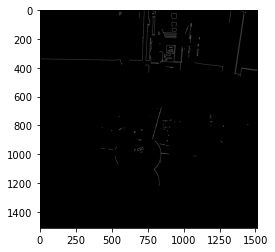

In [81]:
test = cv2.imread("../data/ggul_front.jpg")
test_gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
stretched = contrast_stretching(test_gray)
edge_test = cv2.Canny(test_gray, 100, 200)
plt.imshow(edge_test, cmap='gray')

edge_seg, edge_lines = find_edges_and_segments(edge_test)
print(len(edge_seg), len(edge_lines))

print(len(edge_lines) / len(edge_seg))

In [49]:
contour_list = list()
for c in contours :
    if len(c) > 50 :
        contour_list.append(c)
len(contour_list)

31

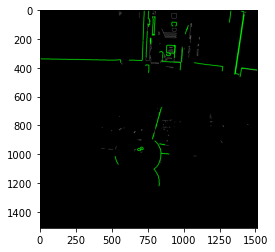

In [50]:
color_image = cv2.cvtColor(edge_test, cv2.COLOR_GRAY2BGR)
contours, _ = cv2.findContours(edge_test, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(color_image, contour_list, -1, (0, 255, 0), 3)  # Draw contours in green

plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))

369 256
0.6937669376693767


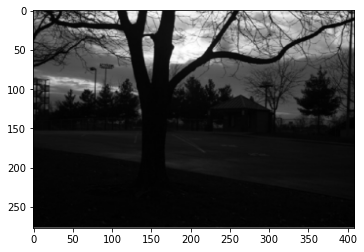

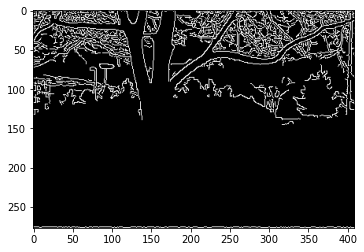

In [25]:
test = cv2.imread("../data/dark_img.png")
test_gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
plt.imshow(test_gray,cmap='gray')

plt.figure()

edge_test = cv2.Canny(test_gray, 100, 200)
plt.imshow(edge_test, cmap='gray')

edge_seg, edge_lines = find_edges_and_segments(edge_test)
print(len(edge_seg), len(edge_lines))

print(len(edge_lines) / len(edge_seg))

In [9]:
def add_random_noise(image, seed=0):
    np.random.seed(seed)
    # 임의의 잡음 추가: 임펄스 잡음과 가우시안 잡음
    noise_types = ['s&p', 'gaussian']
    noise_type = np.random.choice(noise_types)

    if noise_type == 's&p':
        row, col = image.shape
        s_vs_p = 0.5
        amount = 0.04
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount * image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
        out[coords] = 0
        return out
    elif noise_type == 'gaussian':
        mean = 0
        var = 0.1
        sigma = var ** 0.5
        gaussian = np.random.normal(mean, sigma, image.shape)
        noisy_image = np.clip(image + gaussian, 0, 255)
        return noisy_image.astype(np.uint8)
    
def adjust_brightness_contrast(image, brightness=0, contrast=0,seed=0):
    v = np.arange(-30, 30, 5)
    brightness = np.random.choice(v)
    contrast = np.random.choice(v)
    # 밝기와 대조 조절
    B = brightness / 255.0
    c = contrast / 255.0
    k = np.tan((45 + 44 * c) / 180 * np.pi)

    image = (image - 127.5 * (1 - B)) * k + 127.5 * (1 + B)
    image = np.clip(image, 0, 255)
    return image.astype(np.uint8)


def adjusted_img(image,seed=0) : 
    adjusted = adjust_brightness_contrast(image, -20, 10,seed)
    out = add_random_noise(adjusted,seed)
    return out 

In [99]:
v = np.arange(0.25, 2.0, 0.1)
v

array([0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25,
       1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95])

In [4]:
def transform_img(img, seed) : 
    v = np.arange(0.25, 2.0, 0.1)
    np.random.seed(seed)
    factor1 = np.random.choice(v)
    np.random.seed(seed+1)
    factor2 = np.random.choice(v)
    
    img = np.array(255 * (img / 255) ** factor1, dtype='uint8')
    return  cv2.multiply(img, factor2)

[[172 172 172 ... 189 187 187]
 [172 172 172 ... 189 187 187]
 [172 172 172 ... 189 187 187]
 ...
 [ 91  91  91 ...  91  91  91]
 [ 91  91  91 ...  92  92  92]
 [ 91  91  91 ...  92  92  92]]


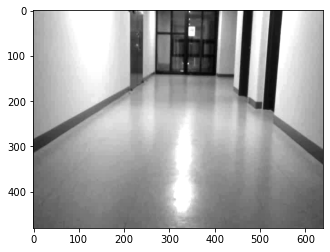

In [116]:
out = transform_img(gray, seed=10)
plt.imshow(out, cmap='gray')

print(out)

In [51]:
v = np.arange(0.25, 2.1, 0.25)
v

array([0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

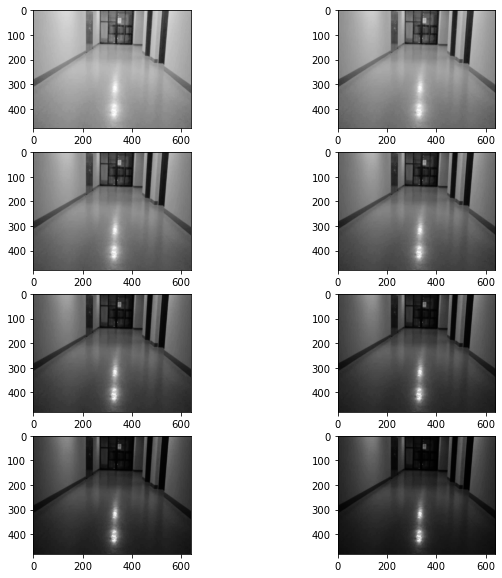

In [53]:
plt.figure(figsize=(10, 10))
for idx, f in enumerate(v) : 
    temp = np.array(255 * (gray / 255) ** f, dtype='uint8')
    plt.subplot(4,2,idx+1)
    plt.imshow(temp, cmap='gray')
    
    
plt.show()

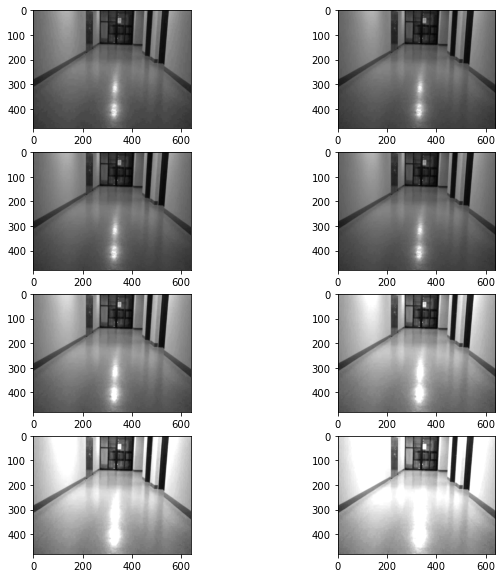

In [54]:
plt.figure(figsize=(10, 10))
for idx, f in enumerate(v) : 
    temp = cv2.multiply(gray, f)
    plt.subplot(4,2,idx+1)
    plt.imshow(temp, cmap='gray')
    
    
plt.show()

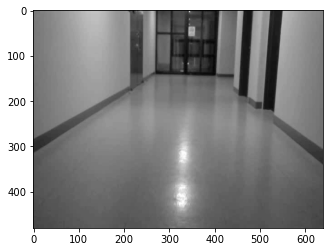

In [47]:
def adjust_img(image, seed) :
    v = np.arange(0, 2.1, 0.25)
    np.random.seed(seed)
    factor = np.random.choice(v)
    bright_adjusted = np.array(255 * (image / 255) ** factor, dtype='uint8')
    np.random.seed(seed+1)
    factor = np.random.choice(v)
    contrast_adjusted = cv2.multiply(bright_adjusted, factor)
    return contrast_adjusted

out = adjust_img(gray, np.random.choice(np.arange(1, 100)))
plt.imshow(out, cmap='gray')

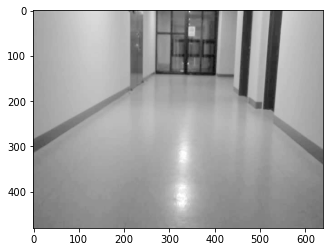

In [25]:
brightness = np.random.choice(v)
brightness

out = np.array(255 * (gray / 255) ** brightness, dtype='uint8')
plt.imshow(out, cmap='gray')

In [ ]:
def adjust_brightness(image, gamma):
    """ 이미지의 밝기 조절 """
    return np.array(255 * (image / 255) ** gamma, dtype='uint8')

def adjust_contrast(image, contrast_factor):
    """ 이미지의 대비 조절 """
    adjusted = cv2.multiply(image, contrast_factor)
    return adjusted

# 밝기 및 대비 조절
brightness_factors = [0.25, 0.5, 1.5, 2]  # 밝기 조절 계수
contrast_factors = [0.1, 0.5, 1.5, 2]    # 대비 조절 계수

0.5499999999999999 1.2499999999999998


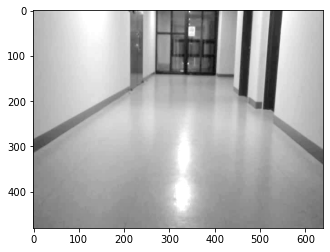

In [93]:
new_img = transform_img(gray, seed=5)
plt.imshow(new_img, cmap='gray')

0.7499999999999999 1.0499999999999998
1.0499999999999998 1.2499999999999998
1.2499999999999998 1.6499999999999997
1.6499999999999997 0.5499999999999999


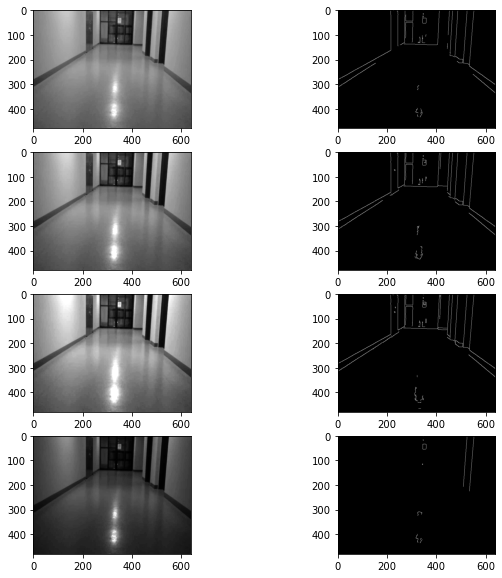

In [105]:
plt.figure(figsize=(10, 10))
pidx = 1
for i in range(1,5) :

    new_img =  transform_img(gray, seed=i)
    plt.subplot(4,2,pidx)
    plt.imshow(new_img, cmap='gray')
    test = cv2.Canny(new_img, 100, 200)
    plt.subplot(4,2,pidx+1)
    pidx += 2
    plt.imshow(test, cmap='gray')

# test = cv2.Canny(gray, 100, 200)
# plt.imshow(test, cmap='gray')

In [26]:
def auto_canny(img, sigma=0.33) : 
    v = np.median(img)
    lower = int(max(0, 1.0 - sigma)*v)
    upper = int(min(255, (1.0 + sigma)*v ))
    return cv2.Canny(img, lower, upper)

def auto_canny_otsu(image):
    high_thresh, _ = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    low_thresh = 0.5 * high_thresh
    return cv2.Canny(image, low_thresh, high_thresh)

0.7499999999999999 1.0499999999999998
1.0499999999999998 1.2499999999999998
1.2499999999999998 1.6499999999999997
1.6499999999999997 0.5499999999999999


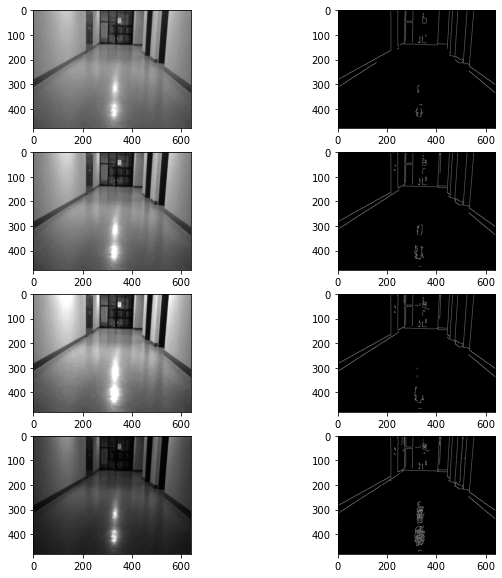

In [107]:
plt.figure(figsize=(10, 10))
pidx = 1
for i in range(1,5) :

    new_img =  transform_img(gray, seed=i)
    plt.subplot(4,2,pidx)
    plt.imshow(new_img, cmap='gray')
    test = auto_canny(new_img)
    plt.subplot(4,2,pidx+1)
    pidx += 2
    plt.imshow(test, cmap='gray')

In [3]:
plt.figure(figsize=(10, 10))
pidx = 1
for i in range(1,5) :

    new_img =  transform_img(gray, seed=i)
    plt.subplot(4,2,pidx)
    plt.imshow(new_img, cmap='gray')
    test = auto_canny_otsu(new_img)
    plt.subplot(4,2,pidx+1)
    pidx += 2
    plt.imshow(test, cmap='gray')

NameError: name 'transform_img' is not defined

<Figure size 720x720 with 0 Axes>

In [11]:
def canny(img) : 
    return cv2.Canny(img, 100, 200)

In [27]:
from itertools import product
import warnings
from skimage.metrics import structural_similarity as compare_ssim
warnings.filterwarnings('ignore')

from sklearn.metrics import roc_auc_score

def compute_luminance(img1, img2):
    return np.mean(img1), np.mean(img2)

def compute_contrast(img1, img2):
    return np.std(img1), np.std(img2)

def calculate_metrics(gt, edge_detected):
    TP = np.sum((gt == 255) & (edge_detected == 255))
    FP = np.sum((gt == 0) & (edge_detected == 255))
    FN = np.sum((gt == 255) & (edge_detected == 0))
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    
    # harmonic mean of recall and precision 
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        
    # auc score 
    gt_binary = ((gt == 255).flatten()).astype(int)
    edge_detected_binary = ((edge_detected == 255).flatten()).astype(int)
    try : 
        auc_score = roc_auc_score(gt_binary, edge_detected_binary)
    except : 
        auc_score = 0.5
    return f1_score, auc_score

def edge_detection(image, filter_type, kernel_size, auto_method):
    if len(image.shape) == 3 :
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else :
        gray = image.copy()
        
    if filter_type == 'gauss' : 
        blur = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
    elif filter_type == 'guided' :
        blur = cv2.ximgproc.guidedFilter(guide=gray.copy(), src=gray, radius=kernel_size, eps=eps)
    else : 
        blur = cv2.medianBlur(gray, kernel_size)
        
    if auto_method == 'median' :
        edge = auto_canny(blur)
    else : 
        edge = auto_canny_otsu(blur)
        
    return edge

def measure_continuity(edges, max_gap=5):
    # 연속성을 확인하기 위해 엣지 픽셀의 좌표를 찾음
    y_coords, x_coords = np.where(edges == 255)
    edge_points = list(zip(x_coords, y_coords))

    # 각 엣지 픽셀에 대해 이전 픽셀과의 거리를 계산
    distances = [np.sqrt((x - edge_points[i - 1][0])**2 + (y - edge_points[i - 1][1])**2) 
                 for i, (x, y) in enumerate(edge_points) if i > 0]

    # 거리가 max_gap 이하인 경우를 연속적인 것으로 간주
    continuous_edges = sum(d <= max_gap for d in distances)
    total_edges = len(distances)

    # 연속성 비율 계산
    continuity_ratio = continuous_edges / total_edges if total_edges > 0 else 0
    return continuity_ratio

def compute_essim(img1, img2, f, ksize, m):
    luminance1, luminance2 = compute_luminance(img1, img2)
    contrast1, contrast2 = compute_contrast(img1, img2)
    edges1, edges2 = edge_detection(img1, f, ksize, m), edge_detection(img2, f, ksize, m)

    l = (2 * luminance1 * luminance2 + 0.01) / (luminance1**2 + luminance2**2 + 0.01)
    c = (2 * contrast1 * contrast2 + 0.03) / (contrast1**2 + contrast2**2 + 0.03)
    e = compare_ssim(edges1, edges2)

    return l * 0.33 + c * 0.33 + e * 0.33


def compute_performance_metric(edge_image, ground_truth, f, ksize, m):
    # F1, AUC, ESSIM, continuity (엣지 연결성)
    f1, auc = calculate_metrics(edge_image,ground_truth)
    essim = compute_essim(edge_image, ground_truth, f, ksize, m)
    continuity = measure_continuity(edge_image)
    return f1*0.25 + essim * 0.25 + continuity * 0.5


filter_type = ['gauss', 'median', ] # 'guided']
auto_method = ['median','otsu']
kernel_sizes=[5,7,9]
# 

# 그리드 서치 실행
best_score = 0
best_params = {}


for f, ksize, m in product(filter_type, kernel_sizes, auto_method) :
    # 각 조합마다 10번 수행, 평균 도출
    print('Finding Best Params . . .')
    rand_scores = 0  
    for i in range(10) :
        GT = edge_detection(gray, f, ksize, m)
        
        rand_img  =  transform_img(gray, seed=i)
        rand_edge = edge_detection(rand_img, f, ksize, m)
        rand_scores += compute_performance_metric(rand_edge, GT, f, ksize, m)
        
    rand_scores = rand_scores / 10 

    if rand_scores > best_score:
        best_score = rand_scores
        best_params = {"kernel_size" : ksize, "filter_type" : f,
                      'auto_method' : m}
print('=' * 25)
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Finding Best Params . . .
Finding Best Params . . .
Finding Best Params . . .
Finding Best Params . . .
Finding Best Params . . .
Finding Best Params . . .
Finding Best Params . . .
Finding Best Params . . .
Finding Best Params . . .
Finding Best Params . . .
Finding Best Params . . .
Finding Best Params . . .
Best Parameters: {'kernel_size': 5, 'filter_type': 'median', 'auto_method': 'otsu'}
Best Score: 0.6209264895284307


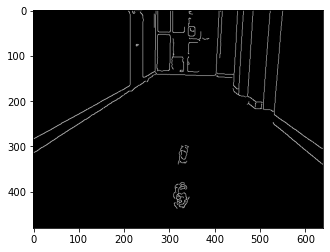

In [28]:
def run_best_edge_detector(image, **params) :
#     for key, val in params.items() :
#         print(key, val)
    if params :
        ksize = params['kernel_size']
        ftype = params['filter_type']
        if ftype == 'gauss' :
            blur = cv2.GaussianBlur(image, (ksize, ksize), 0)
        elif ftype == 'median' : 
            blur = cv2.medianBlur(image, ksize)
        else :
            blur = image.copy()
        
        if auto_method == 'median' : 
            edge = auto_canny(blur)
        else :
            edge = auto_canny_otsu(blur)
    else :
        edge = canny(image)
    return edge
    
edge_best = run_best_edge_detector(gray, **best_params)
plt.imshow(edge_best,cmap='gray')

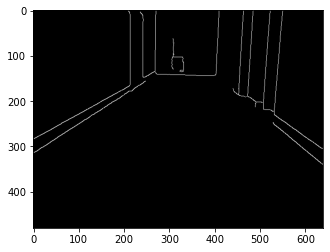

In [84]:
""" simplification 추가 """
def simplify_edges(edge) : 
    contours, _ = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    c_count = 0
    total_length = 0
    for c in contours :
        c_count += len(c)
        length = cv2.arcLength(c, True)
        total_length += length

    mean_val = c_count / len(contours)
    average_length = total_length / len(contours) + 50
    color_image = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

    contour_list = list()

    for c in contours :
        if len(c) > mean_val and cv2.arcLength(c, True) > average_length : 
            contour_list.append(c)
            
    binary_contour_image = np.zeros_like(color_image)
    cv2.drawContours(binary_contour_image, contour_list, -1, (255, 255, 255), 1)
    binary_contour_image = cv2.cvtColor(binary_contour_image, cv2.COLOR_BGR2GRAY)

    return binary_contour_image


simplifed = simplify_edges(edge_best)
plt.imshow(simplifed,cmap='gray')

In [29]:
def transform_img(img, seed) : 
    v = np.arange(0.25, 2.0, 0.1)
    np.random.seed(seed)
    factor1 = np.random.choice(v)
    np.random.seed(seed+1)
    factor2 = np.random.choice(v)
    
    img = np.array(255 * (img / 255) ** factor1, dtype='uint8')
    return  cv2.multiply(img, factor2)

In [75]:
import numpy as np

def get_angle(line):
    x1, y1, x2, y2 = line[0]
    return np.degrees(np.arctan2(y2 - y1, x2 - x1))

def calculate_angle(x1, y1, x2, y2):
    return np.arctan2(y2 - y1, x2 - x1) * 180.0 / np.pi

def get_midpoint(line):
    x1, y1, x2, y2 = line[0]
    return ((x1 + x2) / 2, (y1 + y2) / 2)

def get_line_length(line):
    x1, y1, x2, y2 = line[0]
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def distance_between_points(p1, p2):
    return np.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)

def filter_lines(lines, angle_threshold, dist_threshold):
    filtered_lines = []
    used = [False] * len(lines)

    for i in range(len(lines)):
        if not used[i]:
            max_length = get_line_length(lines[i])
            selected_line = lines[i]
            angle_i = get_angle(lines[i])
            midpoint_i = get_midpoint(lines[i])
            used[i] = True

            for j in range(i + 1, len(lines)):
                if not used[j]:
                    angle_j = get_angle(lines[j])
                    if abs(angle_i - angle_j) <= angle_threshold:
                        midpoint_j = get_midpoint(lines[j])
                        if distance_between_points(midpoint_i, midpoint_j) < dist_threshold:
                            length = get_line_length(lines[j])
                            if length > max_length:
                                selected_line = lines[j]
                                max_length = length
                            used[j] = True
            filtered_lines.append(selected_line)

    return filtered_lines

import cv2
import matplotlib.pyplot as plt
import numpy as np

def auto_canny_otsu(image, ksize=(5, 5)):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    high_thresh, _ = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    low_thresh = 0.5 * high_thresh
    # Canny 엣지 검출 적용
    blur = cv2.GaussianBlur(gray, ksize, 0)
    edged = cv2.Canny(blur, low_thresh, high_thresh)
    return edged

def get_angle(line):
    x1, y1, x2, y2 = line[0]
    return np.degrees(np.arctan2(y2 - y1, x2 - x1))

def get_midpoint(line):
    x1, y1, x2, y2 = line[0]
    return ((x1 + x2) / 2, (y1 + y2) / 2)

def get_line_length(line):
    x1, y1, x2, y2 = line[0]
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def distance_between_points(p1, p2):
    return np.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)

def filter_lines(lines, angle_threshold, dist_threshold):
    filtered_lines = []
    used = [False] * len(lines)

    for i in range(len(lines)):
        if not used[i]:
            max_length = get_line_length(lines[i])
            selected_line = lines[i]
            angle_i = get_angle(lines[i])
            midpoint_i = get_midpoint(lines[i])
            used[i] = True

            for j in range(i + 1, len(lines)):
                if not used[j]:
                    angle_j = get_angle(lines[j])
                    if abs(angle_i - angle_j) <= angle_threshold:
                        midpoint_j = get_midpoint(lines[j])
                        if distance_between_points(midpoint_i, midpoint_j) < dist_threshold:
                            length = get_line_length(lines[j])
                            if length > max_length:
                                selected_line = lines[j]
                                max_length = length
                            used[j] = True
            filtered_lines.append(selected_line)

    return filtered_lines


def find_intersection(line1, line2):
    """ 두 선분의 교차점을 계산합니다. """
    x1, y1, x2, y2 = line1[0]
    x3, y3, x4, y4 = line2[0]

    # 선분의 방정식으로부터 A, B, C 계수를 계산
    A1 = y2 - y1
    B1 = x1 - x2
    C1 = A1 * x1 + B1 * y1
    A2 = y4 - y3
    B2 = x3 - x4
    C2 = A2 * x3 + B2 * y3

    # 행렬식 계산
    determinant = A1 * B2 - A2 * B1
    if determinant == 0:
        # 두 선분이 평행인 경우
        return None
    else:
        # 교차점 계산
        x = (B2 * C1 - B1 * C2) / determinant
        y = (A1 * C2 - A2 * C1) / determinant
        return int(x), int(y)


    
def find_new_points(frame, angle_threshold, dist_threshold) : 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = run_best_edge_detector(gray)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=min_line_length,
                           maxLineGap=max_line_gap)
    new_points = []
    filtered_lines = None
    if lines is not None :
        filtered_lines = filter_lines(lines, angle_threshold, dist_threshold)
        
    if filtered_lines is not None :
        for line in filtered_lines:
            x1, y1, x2, y2 = line[0]
            new_points.append([x1, y1])
            new_points.append([x2, y2])
            
        lines = filtered_lines.copy()  
    
    return new_points, lines
    
def is_point_on_valid_line(point, lines, threshold=10): # threshold=10
    for line in lines:
        x1, y1, x2, y2 = line[0]
#         if x2 - x1 == 0:
#             return x == x1

#         # 기울기(m)와 y절편(b) 계산
#         m = (y2 - y1) / (x2 - x1)
#         b = y1 - m * x1

#         # 점이 직선의 방정식을 만족하는지 확인
#         return y == m * x + b
        dist = cv2.pointPolygonTest(np.array([[x1, y1], [x2, y2]]), (point[0], point[1]), True)
#         result = cv2.pointPolygonTest(np.array([[x1, y1], [x2, y2]]), (point[0], point[1]), False)
#         if dist == -1 or dist == 0 :
#             return True
        if abs(dist) < threshold:
            return True
    return False

def remove_close_points(points, threshold):
    valid_points = []
    for i, point in enumerate(points):
        too_close = False
        for j, other_point in enumerate(points):
            if i != j and distance_between_points(point, other_point) < threshold:
                too_close = True
                break
        if not too_close:
            valid_points.append(point)
    return np.array(valid_points)

In [76]:
min_line_length = 150
max_line_gap = 200

lk_params = dict(winSize=(21, 21), maxLevel=2, 
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 
                           10, 0.03))

angle_threshold = 15 # 중복제거 선 각도 임계
dist_threshold = 50   # 중복제거 선 거리 임계
threshold_distance = 30 # 중복제거 점간 거리 임계

In [77]:
cap = cv2.VideoCapture("./test1.mp4")

ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0, _ = find_new_points(old_frame, angle_threshold, dist_threshold)

# print(p0)
threshold_distance = 15  # 너무 가까운 점 제거
p0 = np.array(p0,dtype=np.float32)
p0 = remove_close_points(p0, threshold_distance)
frame_idx = 0
height, width = old_gray.shape

# 프레임 밖으로 나간 포인트 제거
inside_frame = (p0[:, 0] > 0) & (p0[:, 0] < old_frame.shape[1]) & \
               (p0[:, 1] > 0) & (p0[:, 1] < old_frame.shape[0])
p0 = p0[inside_frame]
p0 = np.array(p0, dtype=np.float32).reshape(-1, 1, 2)
print("초기 시작점 개수 :",len(p0))

초기 시작점 개수 : 7


In [78]:
import time
while True:
    ret, frame = cap.read()
    start = time.time()
    if not ret:
        break
    window = frame.copy()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = run_best_edge_detector(frame)
     # 옵티컬 플로우 계산
    try : 
        p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

        # 좋은 추적 포인트 선택
        good_new = p1[st == 1].reshape(-1, 2)
        good_old = p0[st == 1].reshape(-1, 2)
        
        # 일정 간격으로 새로운 포인트 추가
    #     if len(good_new) < 50 or frame_idx % 30 == 0  : # frame_idx % 30 == 0 
        new_p, lines = find_new_points(frame, angle_threshold, dist_threshold)
        new_p =  np.array(new_p, dtype=np.float32).reshape(-1, 1, 2)
        if len(new_p) > 0:
            new_p = new_p.reshape(-1, 2)  # new_p를 2차원 배열로 변환
            good_new = np.vstack((good_new, new_p))  # 배열을 연결   

        # 프레임 밖으로 나간 포인트 제거
        inside_frame = (good_new[:, 0] > 0) & (good_new[:, 0] < frame.shape[1]) & \
                       (good_new[:, 1] > 0) & (good_new[:, 1] < frame.shape[0])
        good_new = good_new[inside_frame]

        valid_points = [] # 유효한 포인트만 필터링

        for point in good_new:
            if is_point_on_valid_line(point, lines):
                valid_points.append(point)

#         for i in range(len(lines)):
#             for j in range(i + 1, len(lines)):
#                 intersect = find_intersection(lines[i], lines[j])
#                 if intersect:
#                     valid_points.append(intersect)

        # 근접 포인트 제거 
        valid_points = np.array(valid_points)
        valid_points = remove_close_points(valid_points, threshold_distance)

    #     print("number of valid points :",len(valid_points))

        # 포인트 추적 시각화
        for point in valid_points :
            a, b = point.ravel()
            a, b = int(a), int(b)
            cv2.circle(window, (a, b), 5, (0, 255, 0), -1)


    except :
        pass
    
    finally : 
        
        if lines is not None :
            for line in lines :
                x1, y1, x2, y2 = line[0]
                angle = calculate_angle(x1, y1, x2, y2)               
#                 if -10 <= angle <= 10 or 170 <= angle <= 180 or -180 <= angle <= -170:
                if (-100 <= angle <= -80) or (80 <= angle <= 100):  # vertical line 
                    cv2.line(window, (x1, y1), (x2, y2), (0, 255, 0), 3)
                # horizontal
                else :
                    cv2.line(window, (x1, y1), (x2, y2), (255,0, 0), 1)   
        
        cv2.imshow('Frame with Optical Flow', cv2.hconcat([window, cv2.cvtColor(edges,cv2.COLOR_GRAY2BGR)]))

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        # 현재 프레임과 포인트 업데이트
        old_gray = frame_gray.copy()
        p0 = np.array(valid_points, dtype=np.float32).reshape(-1, 1, 2)
    #     print(p0)
    #     print(p0.shape)
        frame_idx += 1
    
cv2.destroyAllWindows()
cap.release()

In [98]:
""" simplification 추가 """
def simplify_edges(edge) : 
    contours, _ = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    c_count = 0
    total_length = 0
    for c in contours :
        c_count += len(c)
        length = cv2.arcLength(c, True)
        total_length += length

    mean_val = c_count / len(contours) + 10
    average_length = total_length / len(contours) + 10
    color_image = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

    contour_list = list()

    for c in contours :
        if len(c) > mean_val and cv2.arcLength(c, True) > average_length : 
            contour_list.append(c)
            
    binary_contour_image = np.zeros_like(color_image)
    cv2.drawContours(binary_contour_image, contour_list, -1, (255, 255, 255), 1)
    binary_contour_image = cv2.cvtColor(binary_contour_image, cv2.COLOR_BGR2GRAY)

    return binary_contour_image

def find_new_points(frame, angle_threshold, dist_threshold) : 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = run_best_edge_detector(gray)
    simplified = simplify_edges(edges)
    lines = cv2.HoughLinesP(simplified, 1, np.pi/180, 100, minLineLength=min_line_length,
                           maxLineGap=max_line_gap)
    new_points = []
    filtered_lines = None
    if lines is not None :
        filtered_lines = filter_lines(lines, angle_threshold, dist_threshold)
        
    if filtered_lines is not None :
        for line in filtered_lines:
            x1, y1, x2, y2 = line[0]
            new_points.append([x1, y1])
            new_points.append([x2, y2])
            
        lines = filtered_lines.copy()  
    
    return new_points, lines

In [99]:
cap = cv2.VideoCapture("./test1.mp4")

ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0, _ = find_new_points(old_frame, angle_threshold, dist_threshold)

# print(p0)

angle_threshold = 15 # 중복제거 선 각도 임계
dist_threshold = 20   # 중복제거 선 거리 임계
threshold_distance = 30 # 중복제거 점간 거리 임계
hough_threshold = 100
min_line_length = 120
max_line_gap = 100


p0 = np.array(p0,dtype=np.float32)
p0 = remove_close_points(p0, threshold_distance)
frame_idx = 0
height, width = old_gray.shape

# 프레임 밖으로 나간 포인트 제거
inside_frame = (p0[:, 0] > 0) & (p0[:, 0] < old_frame.shape[1]) & \
               (p0[:, 1] > 0) & (p0[:, 1] < old_frame.shape[0])
p0 = p0[inside_frame]
p0 = np.array(p0, dtype=np.float32).reshape(-1, 1, 2)
print("초기 시작점 개수 :",len(p0))

초기 시작점 개수 : 6


In [100]:
import time
while True:
    ret, frame = cap.read()
    start = time.time()
    if not ret:
        break
    window = frame.copy()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = run_best_edge_detector(frame)
     # 옵티컬 플로우 계산
    try : 
        p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

        # 좋은 추적 포인트 선택
        good_new = p1[st == 1].reshape(-1, 2)
        good_old = p0[st == 1].reshape(-1, 2)
        
        # 일정 간격으로 새로운 포인트 추가
    #     if len(good_new) < 50 or frame_idx % 30 == 0  : # frame_idx % 30 == 0 
        new_p, lines = find_new_points(frame, angle_threshold, dist_threshold)
        new_p =  np.array(new_p, dtype=np.float32).reshape(-1, 1, 2)
        if len(new_p) > 0:
            new_p = new_p.reshape(-1, 2)  # new_p를 2차원 배열로 변환
            good_new = np.vstack((good_new, new_p))  # 배열을 연결   

        # 프레임 밖으로 나간 포인트 제거
        inside_frame = (good_new[:, 0] > 0) & (good_new[:, 0] < frame.shape[1]) & \
                       (good_new[:, 1] > 0) & (good_new[:, 1] < frame.shape[0])
        good_new = good_new[inside_frame]

        valid_points = [] # 유효한 포인트만 필터링

        for point in good_new:
            if is_point_on_valid_line(point, lines):
                valid_points.append(point)

#         for i in range(len(lines)):
#             for j in range(i + 1, len(lines)):
#                 intersect = find_intersection(lines[i], lines[j])
#                 if intersect:
#                     valid_points.append(intersect)

        # 근접 포인트 제거 
        valid_points = np.array(valid_points)
        valid_points = remove_close_points(valid_points, threshold_distance)

    #     print("number of valid points :",len(valid_points))

        # 포인트 추적 시각화
        for point in valid_points :
            a, b = point.ravel()
            a, b = int(a), int(b)
            cv2.circle(window, (a, b), 5, (0, 255, 0), -1)


    except :
        pass
    
    finally : 
        
        if lines is not None :
            for line in lines :
                x1, y1, x2, y2 = line[0]
                angle = calculate_angle(x1, y1, x2, y2)               
#                 if -10 <= angle <= 10 or 170 <= angle <= 180 or -180 <= angle <= -170:
                if (-100 <= angle <= -80) or (80 <= angle <= 100):  # vertical line 
                    cv2.line(window, (x1, y1), (x2, y2), (0, 255, 0), 3)
                # horizontal
                else :
                    cv2.line(window, (x1, y1), (x2, y2), (255,0, 0), 1)   
        
        cv2.imshow('Frame with Optical Flow', cv2.hconcat([window, cv2.cvtColor(edges,cv2.COLOR_GRAY2BGR)]))

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        # 현재 프레임과 포인트 업데이트
        old_gray = frame_gray.copy()
        p0 = np.array(valid_points, dtype=np.float32).reshape(-1, 1, 2)
    #     print(p0)
    #     print(p0.shape)
        frame_idx += 1
    
cv2.destroyAllWindows()
cap.release()